In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.svm import LinearSVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv("pf_medianagg.csv")
df.drop(df.columns[[0]], axis=1, inplace=True)

In [3]:
df.head()

,school_id,pct_native,pct_asian,pct_hispanic,pct_black,pct_white,pct_pacisl,pct_mixed,free_lunch,reduced_lunch,...,LANDAREA,r_native,r_asian,r_hispanic,r_black,r_white,r_pacisl,r_mixed,r_foodassist,schoolwide_achi
0,1.000050e+10,0.002190,0.006569,0.401460,0.027737,0.543796,0.001460,0.016788,0.310949,0.076343,...,26.779523,inf,inf,24.645257,147.527906,12.947729,inf,25.795815,1.946739,20.0
1,1.000060e+10,0.000000,0.002933,0.043988,0.020528,0.926686,0.000000,0.005865,0.563050,0.046921,...,488.942901,NaN,inf,NaN,inf,61.245940,NaN,24.188270,4.208489,14.5
2,1.000060e+10,0.016639,0.004992,0.277870,0.011647,0.687188,0.000000,0.001664,0.623960,0.089850,...,488.942901,inf,inf,NaN,inf,45.417181,NaN,6.862063,4.663760,15.0
3,1.000060e+10,0.004386,0.004386,0.019737,0.010965,0.953947,0.000000,0.006579,0.381579,0.054825,...,488.942901,inf,inf,NaN,inf,63.047666,NaN,27.132237,2.852094,30.0
4,1.016900e+10,0.003289,0.011513,0.078947,0.078947,0.794408,0.001645,0.031250,0.328947,0.019737,...,25.386423,inf,45.443481,26.543576,67.210526,13.824289,inf,34.790064,2.038661,30.0


In [4]:
df = df.replace([np.inf, -np.inf], np.nan)
for i in range(len(df.columns)):
    df.iloc[:, i] = df.iloc[:, i].fillna(df.iloc[:, i].median(skipna=True))

In [5]:
[(df.columns.get_loc(c), c) for c in df.columns]

[(0, 'school_id'),
 (1, 'pct_native'),
 (2, 'pct_asian'),
 (3, 'pct_hispanic'),
 (4, 'pct_black'),
 (5, 'pct_white'),
 (6, 'pct_pacisl'),
 (7, 'pct_mixed'),
 (8, 'free_lunch'),
 (9, 'reduced_lunch'),
 (10, 'total'),
 (11, 'grad_rate_all'),
 (12, 'grad_rate_native'),
 (13, 'grad_rate_asian'),
 (14, 'grad_rate_black'),
 (15, 'grad_rate_hispanic'),
 (16, 'grad_rate_mixed'),
 (17, 'grad_rate_linc'),
 (18, 'total_salaries_ps'),
 (19, 'salaries_instruction_ps'),
 (20, 'salaries_teachers_ps'),
 (21, 'AHY1E001'),
 (22, 'AHY2E002'),
 (23, 'AHY2E003'),
 (24, 'AHY2E004'),
 (25, 'AHY2E005'),
 (26, 'AHY2E006'),
 (27, 'AHY2E007'),
 (28, 'AHY2E008'),
 (29, 'AHZBE003'),
 (30, 'AHZUE009'),
 (31, 'AHZUE015'),
 (32, 'AH04E017'),
 (33, 'AH04E018'),
 (34, 'AH04E022'),
 (35, 'AH04E023'),
 (36, 'AH04E024'),
 (37, 'AH04E025'),
 (38, 'AH1JE002'),
 (39, 'AH1JE003'),
 (40, 'AH1JE004'),
 (41, 'AH1JE005'),
 (42, 'AH1JE006'),
 (43, 'AH1JE007'),
 (44, 'AH1JE008'),
 (45, 'AH1KE002'),
 (46, 'AH1LE001'),
 (47, 'AH1PE00

## Column Selection 1

In [28]:
cols = df.columns.tolist()
cols_s1 = cols[0:6] + cols[7:9] + cols[11:12] + cols[13:16] + cols[17:19] + cols[21:22] + cols[32:44] + cols[45:50] + cols[53:54] + cols[57:63] + cols[64:]
df1 = df[cols_s1]

In [29]:
data = df1.values

In [30]:
data.shape

(3000, 41)

In [31]:
features = data[:, 0:40]
labels = data[:, 40]

In [32]:
train, test, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2)

In [33]:
lr = LinearRegression(normalize=True)
model = lr.fit(train, train_labels)

In [34]:
test_pred = model.predict(test)
mse_lr = mean_squared_error(test_labels, test_pred)
print(mse_lr)

160.88375069325593


In [35]:
dTreeRg = DecisionTreeRegressor()
model = dTreeRg.fit(train, train_labels)

In [36]:
test_pred = model.predict(test)
mse_dtr = mean_squared_error(test_labels, test_pred)
print(mse_dtr)

209.80041666666668


In [37]:
extTreeRg = ExtraTreesRegressor(n_estimators=100)
model = extTreeRg.fit(train, train_labels)

In [38]:
test_pred = extTreeRg.predict(test)
mse_etr = mean_squared_error(test_labels, test_pred)
print(mse_etr)

101.034944375


In [39]:
randForsRg = RandomForestRegressor(n_estimators=100)
model = randForsRg.fit(train, train_labels)

In [40]:
test_pred = randForsRg.predict(test)
mse_rfr = mean_squared_error(test_labels, test_pred)
print(mse_rfr)

102.286164875


In [41]:
aBoostRg = AdaBoostRegressor()
model = aBoostRg.fit(train, train_labels)

In [42]:
test_pred = aBoostRg.predict(test)
mse_abr = mean_squared_error(test_labels, test_pred)
print(mse_abr)

160.47409691247395


In [43]:
gBoostRg = GradientBoostingRegressor()
model = gBoostRg.fit(train, train_labels)

In [44]:
test_pred = gBoostRg.predict(test)
mse_gbr = mean_squared_error(test_labels, test_pred)
print(mse_gbr)

108.90385742830931


In [45]:
bagRg = BaggingRegressor()
model = bagRg.fit(train, train_labels)

In [46]:
test_pred = bagRg.predict(test)
mse_br = mean_squared_error(test_labels, test_pred)
print(mse_br)

115.90002499999997


## Column Selection 2

In [6]:
cols = df.columns.tolist()
cols_s2 = cols[0:6] + cols[7:9] + cols[11:12] + cols[13:16] + cols[17:19] + cols[21:22] + cols[32:44] + cols[45:50] + cols[53:54] + cols[65:] 
df2 = df[cols_s2]

In [7]:
[(i, cols_s2[i]) for i in range(len(cols_s2))]

[(0, 'school_id'),
 (1, 'pct_native'),
 (2, 'pct_asian'),
 (3, 'pct_hispanic'),
 (4, 'pct_black'),
 (5, 'pct_white'),
 (6, 'pct_mixed'),
 (7, 'free_lunch'),
 (8, 'grad_rate_all'),
 (9, 'grad_rate_asian'),
 (10, 'grad_rate_black'),
 (11, 'grad_rate_hispanic'),
 (12, 'grad_rate_linc'),
 (13, 'total_salaries_ps'),
 (14, 'AHY1E001'),
 (15, 'AH04E017'),
 (16, 'AH04E018'),
 (17, 'AH04E022'),
 (18, 'AH04E023'),
 (19, 'AH04E024'),
 (20, 'AH04E025'),
 (21, 'AH1JE002'),
 (22, 'AH1JE003'),
 (23, 'AH1JE004'),
 (24, 'AH1JE005'),
 (25, 'AH1JE006'),
 (26, 'AH1JE007'),
 (27, 'AH1KE002'),
 (28, 'AH1LE001'),
 (29, 'AH1PE001'),
 (30, 'AH19E002'),
 (31, 'AH19E003'),
 (32, 'AH3IE005'),
 (33, 'schoolwide_achi')]

In [23]:
data = df2.values

In [24]:
data.shape

(3000, 34)

In [25]:
features = data[:, 0:33]
labels = data[:, 33]

In [76]:
train, test, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2)

In [77]:
lr = LinearRegression(normalize=True)
model = lr.fit(train, train_labels)

In [78]:
test_pred = model.predict(test)
mse_lr = mean_squared_error(test_labels, test_pred)
print(mse_lr)

148.59876884034685


In [79]:
dTreeRg = DecisionTreeRegressor()
model = dTreeRg.fit(train, train_labels)

In [80]:
test_pred = model.predict(test)
mse_dtr = mean_squared_error(test_labels, test_pred)
print(mse_dtr)

216.13208333333333


In [81]:
extTreeRg = ExtraTreesRegressor(n_estimators=100)
model = extTreeRg.fit(train, train_labels)

In [82]:
test_pred = extTreeRg.predict(test)
mse_etr = mean_squared_error(test_labels, test_pred)
print(mse_etr)

95.46468804166666


In [83]:
mse_etr_abs = mean_absolute_error(test_labels, test_pred)
print(mse_etr_abs)

7.411075


In [84]:
importances = extTreeRg.feature_importances_
print(importances)

[7.72079232e-02 1.37127851e-02 1.07730837e-01 2.25159129e-02
 3.41780855e-02 3.09674064e-02 1.43251610e-02 2.44712052e-01
 1.13623936e-01 4.17261853e-03 4.72977519e-03 5.30042099e-02
 5.47940995e-02 2.95646349e-02 1.67424572e-02 1.01533841e-02
 1.17243260e-02 8.71518738e-03 8.89066678e-03 1.01541488e-02
 6.55067488e-03 8.40328147e-03 9.93452600e-03 1.15145246e-02
 1.18294255e-02 1.31274616e-02 1.06499413e-02 1.44768243e-02
 3.46104597e-06 8.31758515e-03 9.80851282e-03 8.63235758e-03
 1.51318160e-02]


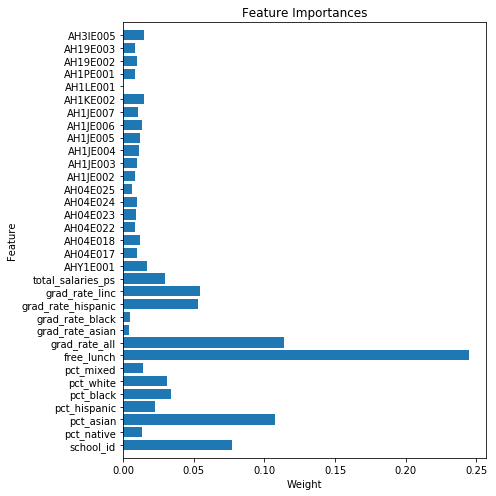

In [117]:
# Plot the feature importances of the forest
fig = plt.figure(figsize=(7,7))
plt.title("Feature Importances")
plt.xlabel("Weight")
plt.ylabel("Feature")
plt.barh(range(train.shape[1]), importances, align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(train.shape[1]), cols_s2[:-1])
plt.ylim([-1, train.shape[1]])
plt.tight_layout()
plt.show()

In [118]:
fig.savefig('feat_im.png')

In [119]:
from sklearn.base import clone 

def drop_col_feat_imp(model, train, train_labels, test, test_labels):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # training and scoring the benchmark model
    model_clone.fit(train, train_labels)
    test_pred = model_clone.predict(test)
    benchmark_mse = mean_squared_error(test_labels, test_pred)
    print(benchmark_mse)
    # list for storing feature drop importances
    importances = []
    
    # iterating over all columns and storing feature drop importance 
    #(difference between new model w/o feature and benchmark model)
    for i in range(train.shape[1]):
        model_clone = clone(model)
        model_clone.fit(np.delete(train, i, axis = 1), train_labels)
        test_pred = model_clone.predict(np.delete(test, i, axis = 1))
        drop_col_mse = mean_squared_error(test_labels, test_pred)
        print(drop_col_mse)
        importances.append(drop_col_mse - benchmark_mse)
    
    return importances

In [120]:
drop_importances = drop_col_feat_imp(extTreeRg, train, train_labels, test, test_labels)

95.88854562499999
102.94325079166666
95.36292345833334
102.71487279166666
97.64937475
94.74626762499999
95.930565375
95.63527670833334
110.943592125
102.73281979166666
97.43629791666666
94.197577125
95.52598033333334
98.38596675000001
100.109600625
97.09253570833333
96.4672375
95.5557775
96.81620075000001
97.41890566666666
97.66158554166667
97.08742616666666
94.98887058333334
95.82177995833332
94.81313520833334
96.53837275000001
95.83977595833333
95.80061283333333
97.16712354166667
96.14373141666667
97.025915125
97.08318395833334
95.99531704166667
97.69173120833334


In [121]:
print(drop_importances)

[7.054705166666665, -0.5256221666666505, 6.8263271666666725, 1.760829125000015, -1.1422780000000046, 0.04201975000000857, -0.25326891666665574, 15.055046500000003, 6.844274166666665, 1.5477522916666686, -1.6909684999999968, -0.3625652916666553, 2.4974211250000167, 4.221055000000007, 1.2039900833333377, 0.5786918750000041, -0.332768124999987, 0.9276551250000153, 1.5303600416666683, 1.7730399166666757, 1.198880541666668, -0.8996750416666544, -0.06676566666666872, -1.0754104166666565, 0.6498271250000158, -0.04876966666665794, -0.08793279166665968, 1.278577916666677, 0.2551857916666762, 1.1373695000000055, 1.1946383333333443, 0.10677141666667467, 1.8031855833333452]


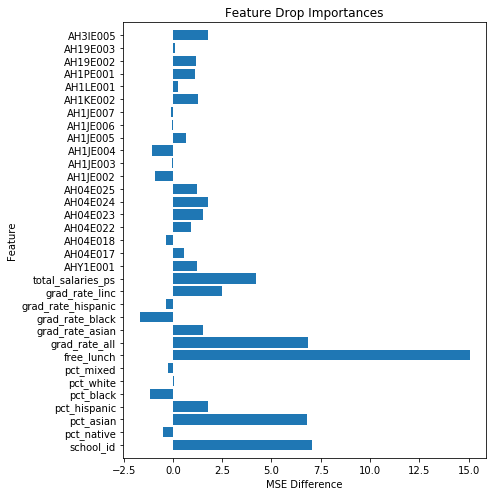

In [122]:
# Plot the feature importances of the forest
fig = plt.figure(figsize=(7,7))
plt.title("Feature Drop Importances")
plt.xlabel("MSE Difference")
plt.ylabel("Feature")
plt.barh(range(train.shape[1]), drop_importances, align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(train.shape[1]), cols_s2[:-1])
plt.ylim([-1, train.shape[1]])
plt.tight_layout()
plt.show()

In [123]:
fig.savefig('feat_dropim.png')

In [92]:
randForsRg = RandomForestRegressor(n_estimators=100)
model = randForsRg.fit(train, train_labels)

In [93]:
test_pred = randForsRg.predict(test)
mse_rfr = mean_squared_error(test_labels, test_pred)
print(mse_rfr)

104.07164204166666


In [94]:
aBoostRg = AdaBoostRegressor()
model = aBoostRg.fit(train, train_labels)

In [95]:
test_pred = aBoostRg.predict(test)
mse_abr = mean_squared_error(test_labels, test_pred)
print(mse_abr)

153.8053911940079


In [96]:
gBoostRg = GradientBoostingRegressor()
model = gBoostRg.fit(train, train_labels)

In [97]:
test_pred = gBoostRg.predict(test)
mse_gbr = mean_squared_error(test_labels, test_pred)
print(mse_gbr)

107.57930883822148


In [98]:
bagRg = BaggingRegressor()
model = bagRg.fit(train, train_labels)

In [99]:
test_pred = bagRg.predict(test)
mse_br = mean_squared_error(test_labels, test_pred)
print(mse_br)

108.68304166666667


## Column Selection Three

In [127]:
cols = df.columns.tolist()
cols_s3 = cols_s2[0:1] + cols_s2[2:3] + cols_s2[4:6] + cols_s2[7:9] + cols_s2[11:14] + cols_s2[15:23] + cols_s2[24:25] + cols_s2[26:27] + cols_s2[30:31] + cols_s2[32:]  
df3 = df[cols_s3]

In [128]:
[(i, cols_s3[i]) for i in range(len(cols_s3))]

[(0, 'school_id'),
 (1, 'pct_asian'),
 (2, 'pct_black'),
 (3, 'pct_white'),
 (4, 'free_lunch'),
 (5, 'grad_rate_all'),
 (6, 'grad_rate_hispanic'),
 (7, 'grad_rate_linc'),
 (8, 'total_salaries_ps'),
 (9, 'AH04E017'),
 (10, 'AH04E018'),
 (11, 'AH04E022'),
 (12, 'AH04E023'),
 (13, 'AH04E024'),
 (14, 'AH04E025'),
 (15, 'AH1JE002'),
 (16, 'AH1JE003'),
 (17, 'AH1JE005'),
 (18, 'AH1JE007'),
 (19, 'AH19E002'),
 (20, 'AH3IE005'),
 (21, 'schoolwide_achi')]

In [129]:
data = df3.values

In [130]:
data.shape

(3000, 22)

In [131]:
features = data[:, 0:21]
labels = data[:, 21]

In [132]:
train, test, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2)

In [133]:
lr = LinearRegression(normalize=True)
model = lr.fit(train, train_labels)

In [134]:
test_pred = model.predict(test)
mse_lr = mean_squared_error(test_labels, test_pred)
print(mse_lr)

135.75229228873752


In [135]:
dTreeRg = DecisionTreeRegressor()
model = dTreeRg.fit(train, train_labels)

In [136]:
test_pred = model.predict(test)
mse_dtr = mean_squared_error(test_labels, test_pred)
print(mse_dtr)

183.895


In [137]:
extTreeRg = ExtraTreesRegressor(n_estimators=100)
model = extTreeRg.fit(train, train_labels)

In [138]:
test_pred = extTreeRg.predict(test)
mse_etr = mean_squared_error(test_labels, test_pred)
print(mse_etr)

82.80730645833333


In [281]:
extTreeRg_e1 = ExtraTreesRegressor(n_estimators=10)
model = extTreeRg_e1.fit(train, train_labels)

In [282]:
test_pred = extTreeRg_e1.predict(test)
mse_etr = mean_squared_error(test_labels, test_pred)
print(mse_etr)

114.4172375


In [300]:
extTreeRg_e2 = ExtraTreesRegressor(n_estimators=1000)
model = extTreeRg_e2.fit(train, train_labels)

In [301]:
test_pred = extTreeRg_e2.predict(test)
mse_etr = mean_squared_error(test_labels, test_pred)
print(mse_etr)

99.17635419541666


In [322]:
extTreeRg_d1 = ExtraTreesRegressor(n_estimators=100, max_depth=50)
model = extTreeRg_d1.fit(train, train_labels)

In [323]:
test_pred = extTreeRg_d1.predict(test)
mse_etr = mean_squared_error(test_labels, test_pred)
print(mse_etr)

99.99991241666666


## Visualizing Decision Trees

In [302]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [303]:
dot_data = StringIO()
export_graphviz(extTreeRg.estimators_[0], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("extTreeRg_dtree_ex.pdf")

True

## Neural Network

In [82]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [87]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=33, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=33, kernel_initializer='normal', activation='relu'))
	model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [98]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, features, labels, cv=kfold)

In [99]:
tf.cast(results.mean(), float)

<tf.Tensor 'Cast_6:0' shape=() dtype=float32>

In [100]:
print(results.mean())

-8375.137315381367
